#**Lab Assignment 5: Exploratory Data Analysis with Seaborn**

##**Instructions**

In your own Google Colab, use the commands presented in the previous sections to create the following graphs using the 'titanic' example dataset included with Seaborn. You will be graded based on whether your Colab notebook can produce graphs identical or near-identical to the three plots at the end of this assignment.

#**Daniela Cebotari LAB 5, SEABORN**#

##**Solution**##

First off, to start, we will import the 'titanic' dataset. This is dataset contains information about the passengers who had boarded the _Titanic_, a ship which sank during its maiden voyage after crashing into an iceberg. Perhaps by exploring this dataset we can learn more about what happened that day.


---

We will do so by the help of the command:

In [22]:
lab2_data = sns.load_dataset('titanic')
lab2_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Let's start by using a bar graph to investigate whether the type of booking (first class, second class, third class) on the _Titanic_ may be related to passengers' mean survival rate.


In [23]:
import seaborn as sns

<Axes: xlabel='class', ylabel='survived'>

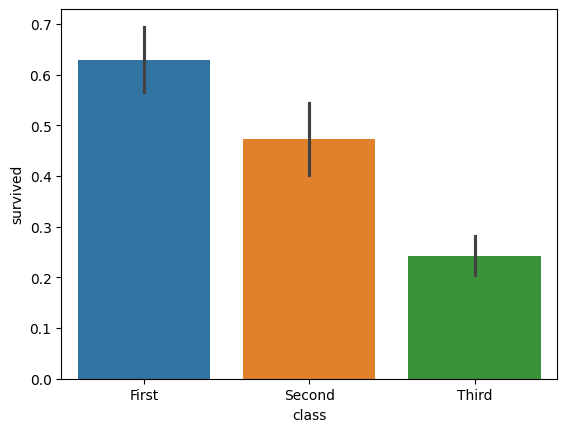

In [46]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='class')

It appears that monetary wealth may have played a role in whether a passenger survived the destruction of the _Titanic_.

Next, let's investigate whether an individual was a man, woman, or child could be a factor that influenced passengers' survival rates too.

<Axes: xlabel='class', ylabel='survived'>

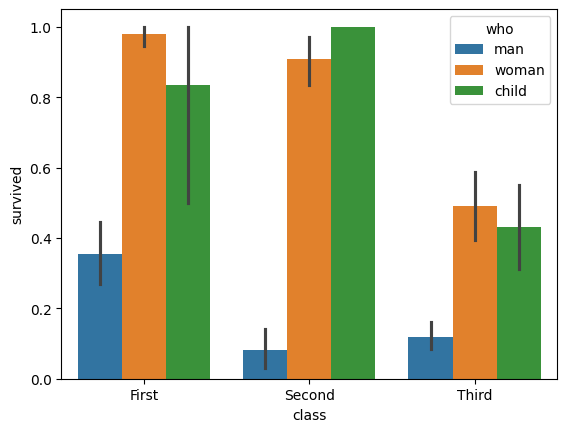

In [25]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='who')

Based on this, it looks there was a significant difference between the survival rates of men vs. women and children regardless of booking. Let's see if this type of difference is also present among children by seperating them into boys and girls.

In [26]:
import pandas as pd
lab2_data.loc[(lab2_data['who'] == 'child') & (lab2_data['sex'] == 'male'), 'who'] = 'boy'
lab2_data.loc[(lab2_data['who'] == 'child') & (lab2_data['sex'] == 'female'), 'who'] = 'girl'

<Axes: xlabel='class', ylabel='survived'>

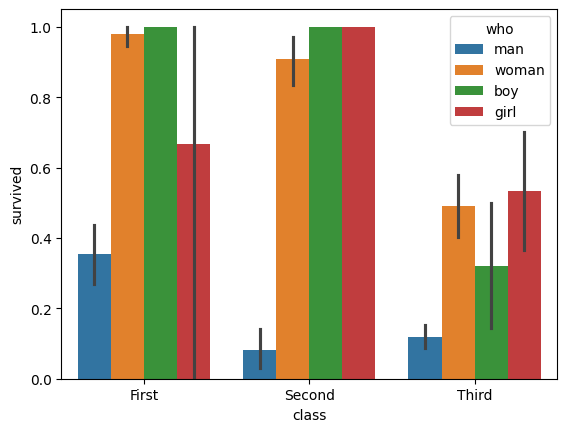

In [27]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='who')

Interestingly, it appears an individual's sex was not a strong predictor of survival among the _Titanic's_ children.

Now that we've obtained a graph we might want to share, let's adjust it to the following arbritrary specifications to practice new Seaborn skills:
*   Error bars should represent 90% confidence intervals
*   The error bars should have whiskers that have a length of 0.05

<ipython-input-63-6fc1f79693e4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.barplot(data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90)


<Axes: xlabel='class', ylabel='survived'>

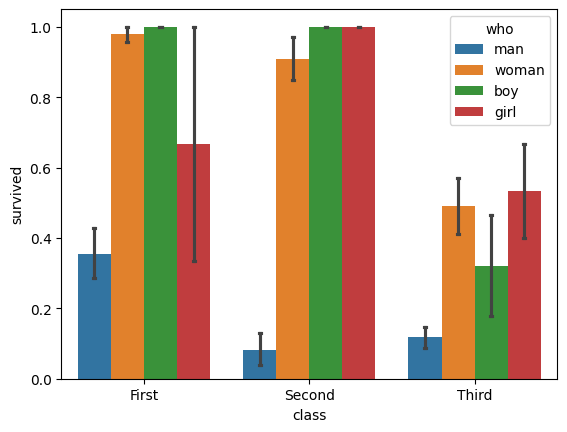

In [63]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90)

 Let's now take a closer look at the passengers themselves by plotting the ages of those who survived and those who didn't.

In [52]:
hue_order=['man', 'woman', 'boy', 'girl']

<Axes: xlabel='survived', ylabel='age'>

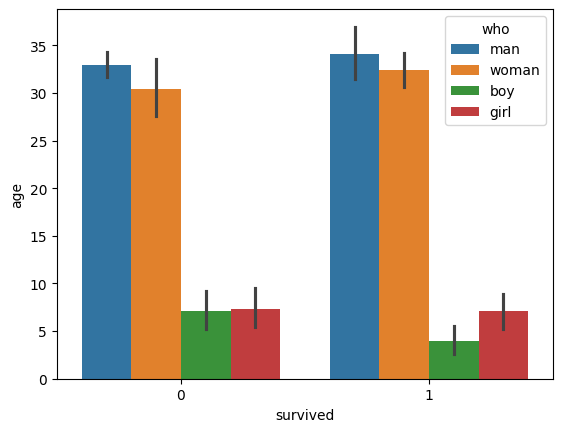

In [53]:
sns.barplot(data=lab2_data, x='survived', y='age', hue='who', hue_order=hue_order)

The first improvement we can make here is to rename the x-axis values of 0 and 1 to 'no' and 'yes' respectively. This will help clarify the meaning of both categories. To do so, we can create a new column called 'survived_str', aka survived string, where we switch up the integers to string values.

In [54]:
lab2_data.loc[(lab2_data['survived'] == 0), 'survived_str'] = 'no'
lab2_data.loc[(lab2_data['survived'] == 1),  'survived_str'] = 'yes'

In [55]:
lab2_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_str
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,no
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,yes
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,no
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,yes


<Axes: xlabel='survived_str', ylabel='age'>

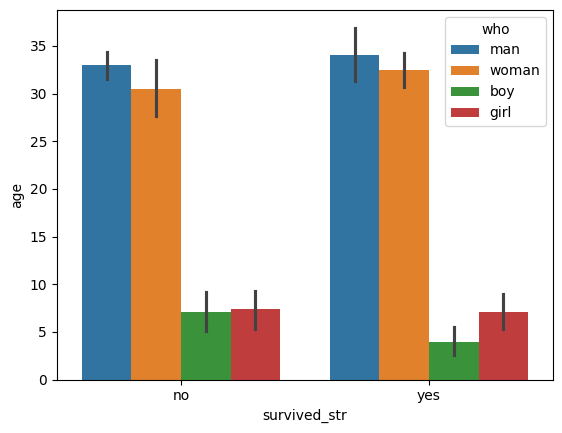

In [59]:
sns.barplot(data=lab2_data, x='survived_str', y='age', hue='who', hue_order=hue_order)

Now that we've again obtained a graph we might want to share, let's adjust it to the following arbritrary specifications for practice:
*   Error bars should represent standard deviation
*   The error bars should have whiskers that have a length of 0.05
*   Instead of the sample mean, the bars should represent the sample median

In [33]:
import numpy as np

<Axes: xlabel='survived_str', ylabel='age'>

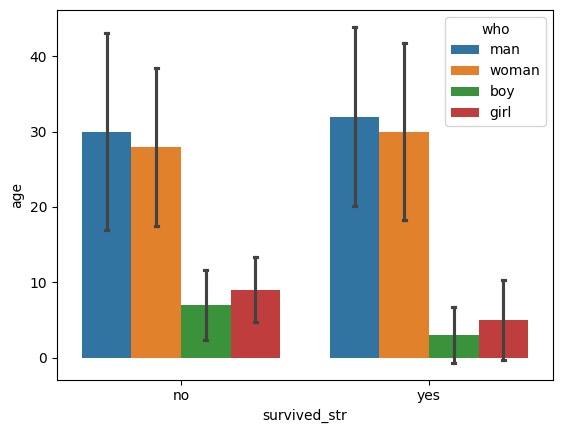

In [67]:
sns.barplot(data=lab2_data, x='survived_str', y='age', hue='who', errorbar='sd', capsize=0.05, estimator = np.median, hue_order=hue_order)

In order to prouduce a graph more worthy of publication, let's convert our bar plot into a box plot and a strip plot.  

In [35]:
import numpy as np

<Axes: xlabel='survived_str', ylabel='age'>

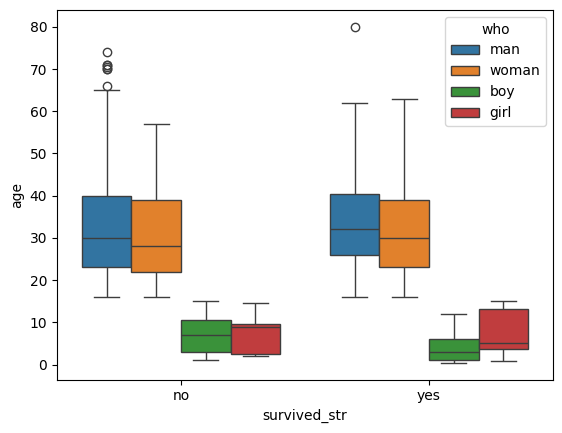

In [69]:
sns.boxplot(data=lab2_data, x='survived_str', y='age', hue='who', hue_order=hue_order)

Next, let's produce a strip plot version of this graph with datapoints that are half-transparent and jitter set to 0.3 .

<Axes: xlabel='survived', ylabel='age'>

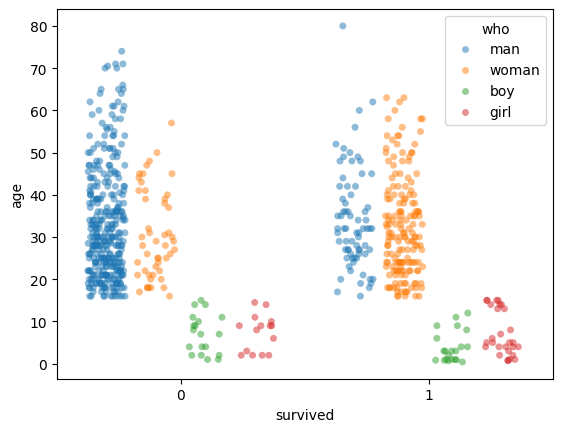

In [70]:
sns.stripplot(data=lab2_data, x='survived', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', hue_order=hue_order)

That is all :)